# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [57]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: mport the OHLCV dataset into a Pandas DataFrame.

In [58]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head(-5)

,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200
...,...,...,...,...,...
2021-01-14 15:45:00,32.85,32.85,32.85,32.85,100
2021-01-19 09:30:00,33.18,33.18,33.15,33.15,800
2021-01-19 11:15:00,33.07,33.07,33.07,33.07,500


In [59]:
# Filter the date index and close columns
svm_1_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
svm_1_signals_df["Actual Returns"] = svm_1_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
svm_1_signals_df = svm_1_signals_df.dropna()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [60]:
# Set the short window and long window
svm_1_short_window = 4
svm_1_long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
svm_1_signals_df['SMA_Fast'] = svm_1_signals_df['close'].rolling(window=svm_1_short_window).mean()
svm_1_signals_df['SMA_Slow'] = svm_1_signals_df['close'].rolling(window=svm_1_long_window).mean()

svm_1_signals_df = svm_1_signals_df.dropna()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495


In [61]:
# Initialize the new Signal column
svm_1_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
svm_1_signals_df.loc[(svm_1_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
svm_1_signals_df.loc[(svm_1_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0


In [62]:
svm_1_signals_df['Signal'].value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [63]:
# Calculate the strategy returns and add them to the signals_df DataFrame
svm_1_signals_df['Strategy Returns'] = svm_1_signals_df['Actual Returns'] * svm_1_signals_df['Signal'].shift()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0,NaN
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0,0.000000
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0,0.000803
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0,0.000401
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0,0.001202


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0,-0.000896


<AxesSubplot:xlabel='date'>

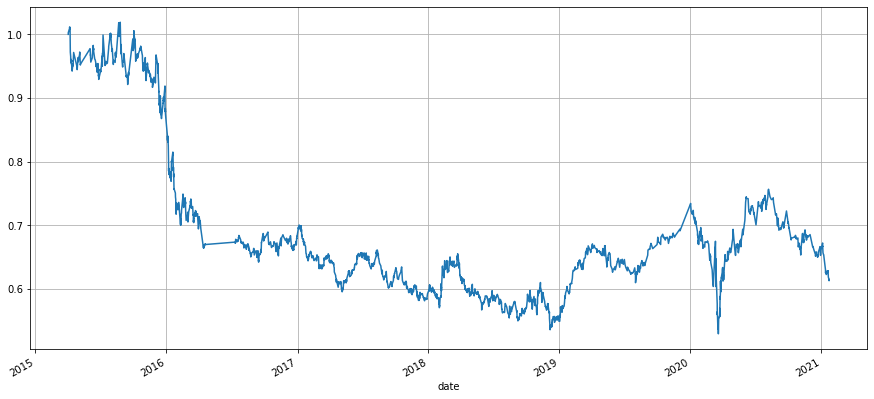

In [64]:
# Plot Strategy Returns to examine performance
(1 + svm_1_signals_df['Strategy Returns']).cumprod().plot(figsize = (15, 7), grid = True)

### Step 3: Split the data into training and testing datasets.

In [65]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
svm_1_X = svm_1_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
svm_1_X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [66]:
# Create the target set selecting the Signal column and assiging it to y
svm_1_y = svm_1_signals_df['Signal']

# Review the value counts
svm_1_y.value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [67]:
# Select the start of the training period
svm_1_training_begin = svm_1_X.index.min()

# Display the training begin date
print(svm_1_training_begin)

2015-04-02 15:00:00


In [68]:
# Select the ending period for the training data with an offset of 3 months
svm_1_training_end = svm_1_X.index.min() + DateOffset(months=3)

# Display the training end date
print(svm_1_training_end)

2015-07-02 15:00:00


In [69]:
# Generate the X_train and y_train DataFrames
svm_1_X_train = svm_1_X.loc[svm_1_training_begin:svm_1_training_end]
svm_1_y_train = svm_1_y.loc[svm_1_training_begin:svm_1_training_end]

# Review the X_train DataFrame
svm_1_X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [70]:
# Generate the X_test and y_test DataFrames
X_test = svm_1_X.loc[svm_1_training_end+DateOffset(hours=1):]
svm_1_y_test = svm_1_y.loc[svm_1_training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
svm_1_X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [71]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
svm_1_X_scaler = scaler.fit(svm_1_X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
svm_1_X_train_scaled = svm_1_X_scaler.transform(svm_1_X_train)
svm_1_X_test_scaled = svm_1_X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [76]:
# From SVM, instantiate SVC classifier model instance
svm_1_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_1_model = svm_1_model.fit(svm_1_X_train_scaled, svm_1_y_train)
 
# Use the testing data to make the model predictions
svm_1_pred = svm_1_model.predict(svm_1_X_test_scaled)

# Review the model's predicted values
svm_1_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [77]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_1_testing_signal_predictions = svm_1_pred

# Use a classification report to evaluate the model using the predictions and testing data
svm_1_testing_report = classification_report(svm_1_y_test, svm_1_testing_signal_predictions)

# Print the classification report
print(svm_1_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [78]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
svm_1_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
svm_1_predictions_df['Predicted'] = svm_1_testing_signal_predictions

# Add the actual returns to the DataFrame
svm_1_predictions_df['Actual Returns'] = svm_1_signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
svm_1_predictions_df['Strategy Returns - SVM'] = svm_1_predictions_df["Actual Returns"] * svm_1_predictions_df["Predicted"]


# Review the DataFrame
display(svm_1_predictions_df.head(5))
display(svm_1_predictions_df.tail(10))

,Predicted,Actual Returns,Strategy Returns - SVM
date,,,
2015-07-06 10:00:00,1.0,-0.025715,-0.025715
2015-07-06 10:45:00,1.0,0.007237,0.007237
2015-07-06 14:15:00,1.0,-0.009721,-0.009721
2015-07-06 14:30:00,1.0,-0.003841,-0.003841
2015-07-07 11:30:00,1.0,-0.018423,-0.018423


,Predicted,Actual Returns,Strategy Returns - SVM
date,,,
2021-01-14 15:45:00,1.0,0.006126,0.006126
2021-01-19 09:30:00,1.0,0.009132,0.009132
2021-01-19 11:15:00,1.0,-0.002413,-0.002413
2021-01-19 12:30:00,1.0,-0.003024,-0.003024
2021-01-20 09:45:00,1.0,0.016075,0.016075
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

In [79]:
# Plot the actual returns versus the strategy returns
actual_returns_hvplot = (1 + svm_1_predictions_df[["Actual Returns"]]).cumprod().hvplot(title="Actual vs. Strategy Returns - SVM", x="date", line_color=(['lightgray']))

actual_returns_hvplot = actual_returns_hvplot.opts(width=800, height=400).opts(title="Actual Returns")

<AxesSubplot:title={'center':'Actual vs. SVM Returns'}, xlabel='date'>

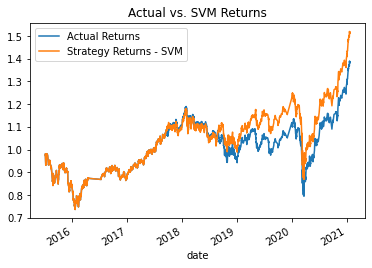

In [80]:
# Plot the actual returns versus the strategy returns
svm_1_returns_plot = (1 + svm_1_predictions_df[["Actual Returns", "Strategy Returns - SVM"]]).cumprod().plot(title="Actual vs. SVM Returns")

svm_1_returns_plot

---

## Tune the Baseline Trading Algorithm

## Step 6: Use an Alternative ML Model and Evaluate Strategy Returns

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

What impact resulted from increasing or decreasing the training window?  

ANSWER: The baseline model was altered by changing the training period from 3 months to 1 month. As a result, the SVC training model appears to have a smaller cumulative return.  The result could vary depending if it's outside or beyond the initial 3 month training period.

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

What impact resulted from increasing or decreasing either or both of the SMA windows?

ANSWER: The result will vary and will not perform as well outside of or beyond a short SMA value of 3 and long SMA value of 110.

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

# Step 2: Generate trading signals using short- and long-window SMA values.

In [81]:
# Filter the date index and close columns
svm_t_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
svm_t_signals_df["Actual Returns"] = svm_t_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
svm_t_signals_df = svm_t_signals_df.dropna()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


In [82]:
# Set the short window and long window
svm_t_short_window = 3
svm_t_long_window = 110

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
svm_t_signals_df['SMA_Fast'] = svm_t_signals_df['close'].rolling(window=svm_t_short_window).mean()
svm_t_signals_df['SMA_Slow'] = svm_t_signals_df['close'].rolling(window=svm_t_long_window).mean()

svm_t_signals_df = svm_t_signals_df.dropna()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-04-06 13:30:00,25.20,0.000794,25.196667,24.391091
2015-04-06 14:15:00,25.22,0.000794,25.200000,24.402364
2015-04-07 12:00:00,25.18,-0.001586,25.200000,24.409273
2015-04-07 15:45:00,25.13,-0.001986,25.176667,24.415545
2015-04-08 09:30:00,25.85,0.028651,25.386667,24.428182


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.246667,30.279500
2021-01-22 11:30:00,33.35,0.002405,33.373333,30.323409
2021-01-22 13:45:00,33.42,0.002099,33.346667,30.364591
2021-01-22 14:30:00,33.47,0.001496,33.413333,30.399682
2021-01-22 15:45:00,33.44,-0.000896,33.443333,30.439500


In [83]:
# Initialize the new Signal column
svm_t_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
svm_t_signals_df.loc[(svm_t_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
svm_t_signals_df.loc[(svm_t_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-06 13:30:00,25.20,0.000794,25.196667,24.391091,1.0
2015-04-06 14:15:00,25.22,0.000794,25.200000,24.402364,1.0
2015-04-07 12:00:00,25.18,-0.001586,25.200000,24.409273,-1.0
2015-04-07 15:45:00,25.13,-0.001986,25.176667,24.415545,-1.0
2015-04-08 09:30:00,25.85,0.028651,25.386667,24.428182,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.246667,30.279500,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.373333,30.323409,1.0
2021-01-22 13:45:00,33.42,0.002099,33.346667,30.364591,1.0
2021-01-22 14:30:00,33.47,0.001496,33.413333,30.399682,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.443333,30.439500,-1.0


In [84]:
svm_t_signals_df['Signal'].value_counts()

 1.0    2359
-1.0    1854
Name: Signal, dtype: int64

In [85]:
# Calculate the strategy returns and add them to the svm_t_signals_df DataFrame
svm_t_signals_df['Strategy Returns - Tuned SVM'] = svm_t_signals_df['Actual Returns'] * svm_t_signals_df['Signal'].shift()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns - Tuned SVM
date,,,,,,
2015-04-06 13:30:00,25.20,0.000794,25.196667,24.391091,1.0,NaN
2015-04-06 14:15:00,25.22,0.000794,25.200000,24.402364,1.0,0.000794
2015-04-07 12:00:00,25.18,-0.001586,25.200000,24.409273,-1.0,-0.001586
2015-04-07 15:45:00,25.13,-0.001986,25.176667,24.415545,-1.0,0.001986
2015-04-08 09:30:00,25.85,0.028651,25.386667,24.428182,1.0,-0.028651


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns - Tuned SVM
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.246667,30.279500,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.373333,30.323409,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.346667,30.364591,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.413333,30.399682,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.443333,30.439500,-1.0,-0.000896


What impact resulted from increasing or decreasing either or both of the SMA windows?

ANSWER: The result varies.  Outside of or beyond the offset of 3, Short SMA of 3 and a Long SMA of 110.

# Step 3: Split the data into training and testing datasets.

In [86]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
svm_t_X = svm_t_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
svm_t_X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-06 14:15:00,25.196667,24.391091
2015-04-07 12:00:00,25.200000,24.402364
2015-04-07 15:45:00,25.200000,24.409273
2015-04-08 09:30:00,25.176667,24.415545
2015-04-08 09:45:00,25.386667,24.428182


In [87]:
# Create the target set selecting the Signal column and assiging it to y
svm_t_y = svm_t_signals_df['Signal']

# Review the value counts
svm_t_y.value_counts()

 1.0    2359
-1.0    1854
Name: Signal, dtype: int64

In [88]:
# Select the start of the training period
svm_t_training_begin = svm_t_X.index.min() + DateOffset(months=0)

# Display the training begin date
print(svm_t_training_begin)

2015-04-06 14:15:00


In [89]:
# Select the ending period for the training data with an offset of __ months
svm_t_training_end = svm_t_training_begin + DateOffset(months=3)

# Display the training end date
print(svm_t_training_end)

2015-07-06 14:15:00


In [90]:
# Generate the X_train and y_train DataFrames
svm_t_X_train = svm_t_X.loc[svm_t_training_begin:svm_t_training_end]
svm_t_y_train = svm_t_y.loc[svm_t_training_begin:svm_t_training_end]

# Review the X_train DataFrame
print('Training DataFrame')
svm_t_X_train.head()

Training DataFrame


,SMA_Fast,SMA_Slow
date,,
2015-04-06 14:15:00,25.196667,24.391091
2015-04-07 12:00:00,25.200000,24.402364
2015-04-07 15:45:00,25.200000,24.409273
2015-04-08 09:30:00,25.176667,24.415545
2015-04-08 09:45:00,25.386667,24.428182


In [91]:
# Generate the X_test and y_test DataFrames
X_test = svm_t_X.loc[svm_t_training_end+DateOffset(hours=1):]
svm_t_y_test = svm_t_y.loc[svm_t_training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
print('Testing DataFrame')
svm_t_X_train.head()

Testing DataFrame


,SMA_Fast,SMA_Slow
date,,
2015-04-06 14:15:00,25.196667,24.391091
2015-04-07 12:00:00,25.200000,24.402364
2015-04-07 15:45:00,25.200000,24.409273
2015-04-08 09:30:00,25.176667,24.415545
2015-04-08 09:45:00,25.386667,24.428182


In [92]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
svm_t_X_scaler = scaler.fit(svm_t_X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
svm_t_X_train_scaled = svm_t_X_scaler.transform(svm_t_X_train)
X_test_scaled = svm_t_X_scaler.transform(X_test)

# Step 3: Split the data into training and testing datasets.

In [93]:
# From SVM, instantiate SVC classifier model instance
svm_t_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_t_model = svm_t_model.fit(svm_t_X_train_scaled, svm_t_y_train)
 
# Use the testing data to make the model predictions
svm_t_pred = svm_t_model.predict(X_test_scaled)

# Review the model's predicted values
svm_t_pred[:10]

array([-1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.])

# Step 5: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [94]:
# Create a predictions DataFrame
svm_t_predictions_df = pd.DataFrame(index=X_test.index)

# Add the Tuned SVM model predictions to the DataFrame
svm_t_predictions_df['Predicted'] = svm_t_pred

# Add the actual returns to the DataFrame
svm_t_predictions_df['Actual Returns'] = svm_t_signals_df["Actual Returns"]

# Add the Tuned SVM model predictions to the DataFrame
svm_t_predictions_df['Strategy Returns - SVM'] = svm_1_predictions_df['Strategy Returns - SVM']

# Add the strategy returns to the DataFrame
svm_t_predictions_df['Strategy Returns - Tuned SVM'] = svm_t_predictions_df["Actual Returns"] * svm_t_predictions_df["Predicted"]

# Review the DataFrame
display(svm_t_predictions_df.head(5))
display(svm_t_predictions_df.tail(10))

,Predicted,Actual Returns,Strategy Returns - SVM,Strategy Returns - Tuned SVM
date,,,,
2015-07-07 11:30:00,-1.0,-0.018423,-0.018423,0.018423
2015-07-07 13:45:00,-1.0,0.005674,0.005674,-0.005674
2015-07-07 15:00:00,-1.0,0.005642,0.005642,-0.005642
2015-07-07 15:45:00,-1.0,-0.001295,-0.001295,0.001295
2015-07-08 10:00:00,-1.0,-0.021175,-0.021175,0.021175


,Predicted,Actual Returns,Strategy Returns - SVM,Strategy Returns - Tuned SVM
date,,,,
2021-01-14 15:45:00,1.0,0.006126,0.006126,0.006126
2021-01-19 09:30:00,1.0,0.009132,0.009132,0.009132
2021-01-19 11:15:00,1.0,-0.002413,-0.002413,-0.002413
2021-01-19 12:30:00,1.0,-0.003024,-0.003024,-0.003024
2021-01-20 09:45:00,1.0,0.016075,0.016075,0.016075
2021-01-22 09:30:00,1.0,-0.006866,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496,0.001496


# Step 6: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<AxesSubplot:title={'center':'Actual vs. Strategy Returns'}, xlabel='date'>

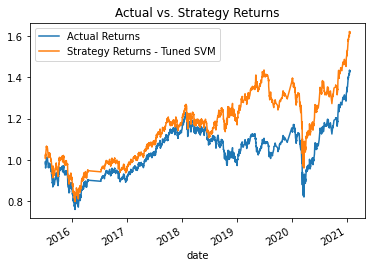

In [95]:
# Plot the actual returns versus the strategy returns
svm_t_returns_plot = (1 + svm_t_predictions_df[["Actual Returns", "Strategy Returns - Tuned SVM"]]).cumprod().plot(title="Actual vs. Strategy Returns")

svm_t_returns_plot

In [96]:
# Plot the actual returns versus the strategy returns
svm_t_returns_hvplot = (1 + svm_t_predictions_df[["Strategy Returns - Tuned SVM", "Strategy Returns - SVM", "Actual Returns"]]).cumprod().hvplot(title="Strategy Returns - Tuned SVM", x="date", line_color=(['orange', 'darkblue', 'lightgray']))

svm_t_returns_hvplot = svm_t_returns_hvplot.opts(legend_position='top_left').opts(width=800, height=400)

svm_t_returns_hvplot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [97]:
# Use the trained model to predict the trading signals for the testing data.
svm_t_testing_signal_predictions = svm_t_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_t_testing_report = classification_report(svm_t_y_test, svm_t_testing_signal_predictions)

# Print the classification report
print("Tuned SVM Classification Report")
print(svm_t_testing_report)

Tuned SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.42      0.06      0.11      1801
         1.0       0.56      0.93      0.70      2287

    accuracy                           0.55      4088
   macro avg       0.49      0.50      0.41      4088
weighted avg       0.50      0.55      0.44      4088



---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [98]:
# Import a new classifier from SKLearn
from sklearn import tree

# Initiate the model instance
tree_model = tree.DecisionTreeClassifier()

In [99]:
# Filter the date index and close columns
lr_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
lr_signals_df["Actual Returns"] = lr_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
lr_signals_df = lr_signals_df.dropna()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


# Step 2: Generate trading signals using short- and long-window SMA values.

In [100]:
# Set the short window and long window
lr_short_window = 4
lr_long_window = 21

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
lr_signals_df['SMA_Fast'] = lr_signals_df['close'].rolling(window=lr_short_window).mean()
lr_signals_df['SMA_Slow'] = lr_signals_df['close'].rolling(window=lr_long_window).mean()

lr_signals_df = lr_signals_df.dropna()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-02-02 10:15:00,23.89,0.005895,23.9125,24.137619
2015-02-02 11:00:00,23.92,0.001256,23.8625,24.134762
2015-02-02 11:15:00,23.94,0.000836,23.8750,24.111905
2015-02-02 11:30:00,23.95,0.000418,23.9250,24.088571
2015-02-02 13:30:00,23.88,-0.002923,23.9225,24.060952


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,32.415238
2021-01-22 11:30:00,33.35,0.002405,33.2725,32.522381
2021-01-22 13:45:00,33.42,0.002099,33.3850,32.634762
2021-01-22 14:30:00,33.47,0.001496,33.3775,32.727143
2021-01-22 15:45:00,33.44,-0.000896,33.4200,32.819048


In [101]:
# Initialize the new Signal column
lr_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
lr_signals_df.loc[(lr_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
lr_signals_df.loc[(lr_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-02-02 10:15:00,23.89,0.005895,23.9125,24.137619,1.0
2015-02-02 11:00:00,23.92,0.001256,23.8625,24.134762,1.0
2015-02-02 11:15:00,23.94,0.000836,23.8750,24.111905,1.0
2015-02-02 11:30:00,23.95,0.000418,23.9250,24.088571,1.0
2015-02-02 13:30:00,23.88,-0.002923,23.9225,24.060952,-1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,32.415238,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,32.522381,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,32.634762,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,32.727143,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,32.819048,-1.0


In [102]:
lr_signals_df['Signal'].value_counts()

 1.0    2422
-1.0    1880
Name: Signal, dtype: int64

In [103]:
# Calculate the strategy returns and add them to the lr_signals_df DataFrame
lr_signals_df['Strategy Returns - LR'] = lr_signals_df['Actual Returns'] * lr_signals_df['Signal'].shift()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns - LR
date,,,,,,
2015-02-02 10:15:00,23.89,0.005895,23.9125,24.137619,1.0,NaN
2015-02-02 11:00:00,23.92,0.001256,23.8625,24.134762,1.0,0.001256
2015-02-02 11:15:00,23.94,0.000836,23.8750,24.111905,1.0,0.000836
2015-02-02 11:30:00,23.95,0.000418,23.9250,24.088571,1.0,0.000418
2015-02-02 13:30:00,23.88,-0.002923,23.9225,24.060952,-1.0,-0.002923


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns - LR
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,32.415238,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,32.522381,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,32.634762,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,32.727143,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,32.819048,-1.0,-0.000896


# Step 3: Split the data into training and testing datasets.

In [104]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
lr_X = lr_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
lr_X.head()

,SMA_Fast,SMA_Slow
date,,
2015-02-02 11:00:00,23.9125,24.137619
2015-02-02 11:15:00,23.8625,24.134762
2015-02-02 11:30:00,23.8750,24.111905
2015-02-02 13:30:00,23.9250,24.088571
2015-02-03 11:15:00,23.9225,24.060952


In [105]:
# Create the target set selecting the Signal column and assiging it to y
lr_y = lr_signals_df['Signal']

# Review the value counts
lr_y.value_counts()

 1.0    2422
-1.0    1880
Name: Signal, dtype: int64

In [106]:
# Select the start of the training period
lr_training_begin = lr_X.index.min() + DateOffset(months=0)

# Display the training begin date
print(lr_training_begin)

2015-02-02 11:00:00


In [107]:
# Select the ending period for the training data with an offset of -__ months
lr_training_end = lr_training_begin + DateOffset(months=3)

# Display the training end date
print(lr_training_end)

2015-05-02 11:00:00


In [108]:
# Generate the X_train and y_train DataFrames
lr_X_train = lr_X.loc[lr_training_begin:lr_training_end]
lr_y_train = lr_y.loc[lr_training_begin:lr_training_end]

# Review the X_train DataFrame
lr_X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-02-02 11:00:00,23.9125,24.137619
2015-02-02 11:15:00,23.8625,24.134762
2015-02-02 11:30:00,23.8750,24.111905
2015-02-02 13:30:00,23.9250,24.088571
2015-02-03 11:15:00,23.9225,24.060952


In [109]:
# Generate the X_test and y_test DataFrames
X_test = lr_X.loc[lr_training_end+DateOffset(hours=1):]
lr_y_test = lr_y.loc[lr_training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

,SMA_Fast,SMA_Slow
date,,
2015-05-04 10:30:00,25.7525,25.983810
2015-05-04 11:15:00,25.8175,25.985238
2015-05-04 14:15:00,25.8800,25.986667
2015-05-06 10:45:00,25.9875,25.994762
2015-05-06 11:15:00,25.9525,25.976190


In [110]:
# Create a StandardScaler instance
lr_scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
lr_X_scaler = lr_scaler.fit(lr_X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
lr_X_train_scaled = lr_X_scaler.transform(lr_X_train)
X_test_scaled = lr_X_scaler.transform(X_test)

# Step 4: Use the Logistic Regression classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [111]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()
 
# Fit the model to the data using the training data
logistic_regression_model.fit(lr_X_train_scaled, lr_y_train)

# Use the testing data to make the model predictions
lr_training_signal_predictions = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
lr_training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Step 5: Review the classification report associated with the Logistic Regrsion model predictions.

In [112]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(lr_y_test, lr_testing_signal_predictions)

# Print the classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.44      0.14      0.22      1828
         1.0       0.56      0.85      0.68      2324

    accuracy                           0.54      4152
   macro avg       0.50      0.50      0.45      4152
weighted avg       0.50      0.54      0.47      4152



# Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [113]:
# Create a predictions DataFrame
lr_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
lr_predictions_df['Predicted'] = lr_testing_signal_predictions

# Add the actual returns to the DataFrame
lr_predictions_df['Actual Returns'] = lr_signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
lr_predictions_df['Strategy Returns - LR'] = lr_predictions_df["Actual Returns"] * lr_predictions_df["Predicted"]


# Review the DataFrame
display(lr_predictions_df.head(5))
display(lr_predictions_df.tail(10))

,Predicted,Actual Returns,Strategy Returns - LR
date,,,
2015-05-04 10:30:00,1.0,0.012830,0.012830
2015-05-04 11:15:00,1.0,0.000000,0.000000
2015-05-04 14:15:00,1.0,0.003071,0.003071
2015-05-06 10:45:00,1.0,-0.021049,-0.021049
2015-05-06 11:15:00,1.0,-0.001173,-0.001173


,Predicted,Actual Returns,Strategy Returns - LR
date,,,
2021-01-14 15:45:00,-1.0,0.006126,-0.006126
2021-01-19 09:30:00,-1.0,0.009132,-0.009132
2021-01-19 11:15:00,-1.0,-0.002413,0.002413
2021-01-19 12:30:00,-1.0,-0.003024,0.003024
2021-01-20 09:45:00,-1.0,0.016075,-0.016075
2021-01-22 09:30:00,-1.0,-0.006866,0.006866
2021-01-22 11:30:00,-1.0,0.002405,-0.002405
2021-01-22 13:45:00,-1.0,0.002099,-0.002099
2021-01-22 14:30:00,-1.0,0.001496,-0.001496


# Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<AxesSubplot:title={'center':'Actual vs. Strategy Returns - LR'}, xlabel='date'>

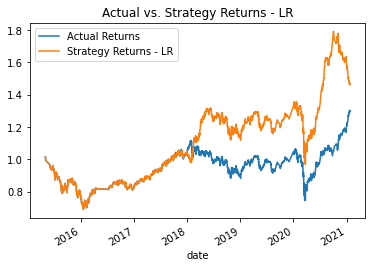

In [114]:
# Plot the actual returns versus the strategy returns
lr_returns_plot = (1 + lr_predictions_df[["Actual Returns", "Strategy Returns - LR"]]).cumprod().plot(title="Actual vs. Strategy Returns - LR")

lr_returns_plot

In [115]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_1_testing_report = classification_report(svm_1_y_test, svm_1_testing_signal_predictions)

# Print the classification report
print("SVM Classification Report")
print(svm_1_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



In [116]:
# Use the trained model to predict the trading signals for the testing data.
# svm_t_testing_signal_predictions = svm_t_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_t_testing_report = classification_report(svm_t_y_test, svm_t_testing_signal_predictions)

# Print the classification report
print("Tuned SVM Classification Report")
print(svm_t_testing_report)

Tuned SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.42      0.06      0.11      1801
         1.0       0.56      0.93      0.70      2287

    accuracy                           0.55      4088
   macro avg       0.49      0.50      0.41      4088
weighted avg       0.50      0.55      0.44      4088



In [117]:
# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(lr_y_test, lr_testing_signal_predictions)

# Print the classification report
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.44      0.14      0.22      1828
         1.0       0.56      0.85      0.68      2324

    accuracy                           0.54      4152
   macro avg       0.50      0.50      0.45      4152
weighted avg       0.50      0.54      0.47      4152



In [118]:
# Create a new empty predictions DataFrame using code provided below.
fin_predictions_df = pd.DataFrame(index=X_test.index)
fin_predictions_df["svm_1_predicted_signal"] = svm_1_predictions_df['Predicted']
fin_predictions_df["svm_t_predicted_signal"] = svm_t_predictions_df['Predicted']
fin_predictions_df["lr_predicted_signal"] = lr_predictions_df['Predicted']

fin_predictions_df["Actual Returns"] = svm_1_signals_df["Actual Returns"]

fin_predictions_df["SVM Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["svm_1_predicted_signal"]

fin_predictions_df["Tuned SVM Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["svm_t_predicted_signal"]

fin_predictions_df["LR Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["lr_predicted_signal"]

fin_predictions_df.head()

,svm_1_predicted_signal,svm_t_predicted_signal,lr_predicted_signal,Actual Returns,SVM Returns,Tuned SVM Returns,LR Returns
date,,,,,,,
2015-05-04 10:30:00,NaN,NaN,1.0,0.012830,NaN,NaN,0.012830
2015-05-04 11:15:00,NaN,NaN,1.0,0.000000,NaN,NaN,0.000000
2015-05-04 14:15:00,NaN,NaN,1.0,0.003071,NaN,NaN,0.003071
2015-05-06 10:45:00,NaN,NaN,1.0,-0.021049,NaN,NaN,-0.021049
2015-05-06 11:15:00,NaN,NaN,1.0,-0.001173,NaN,NaN,-0.001173


In [119]:
# Plot the actual returns versus the LR strategy returns
fin_predictions_df_hvplot = (1 + fin_predictions_df[[
    "SVM Returns", "Tuned SVM Returns", "LR Returns", "Actual Returns"]]
                            ).cumprod().hvplot(title="Actual vs. SVM and LR Strategy Returns", x="date", 
                                               line_color=(['darkblue', 'orange', 'green', 'lightgray']))

fin_predictions_df_hvplot.opts(legend_position='top_left').opts(width=800, height=400)

:NdOverlay   [Variable]
   :Curve   [date]   (value)